In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\kanwa\Documents\academic-performance.csv")
df

,student_id,math_score,english_score,Attendance_percent
0,1,88.0,78.0,92
1,2,92.0,85.0,95
2,3,NaN,84.0,90
3,4,45.0,65.0,70
4,5,77.0,59.0,88
5,6,89.0,77.0,96
6,7,90.0,NaN,94
7,8,95.0,89.0,93
8,9,105.0,90.0,100
9,10,85.0,88.0,105


In [4]:
df.shape

(20, 4)

In [5]:
df.describe()


,student_id,math_score,english_score,Attendance_percent
count,20.00000,18.000000,19.000000,20.000000
mean,10.50000,83.333333,78.000000,88.250000
std,5.91608,20.120227,10.666667,11.368817
min,1.00000,33.000000,59.000000,65.000000
25%,5.75000,77.250000,71.000000,83.750000
50%,10.50000,88.000000,82.000000,91.000000
75%,15.25000,91.750000,85.500000,95.250000
max,20.00000,120.000000,91.000000,105.000000


In [6]:
df.isnull().sum()

student_id            0
math_score            2
english_score         1
Attendance_percent    0
dtype: int64

In [7]:
print(df.isnull().sum())

student_id            0
math_score            2
english_score         1
Attendance_percent    0
dtype: int64


In [8]:
df['student_id'].fillna(df['student_id'].mean())
df

,student_id,math_score,english_score,Attendance_percent
0,1,88.0,78.0,92
1,2,92.0,85.0,95
2,3,NaN,84.0,90
3,4,45.0,65.0,70
4,5,77.0,59.0,88
5,6,89.0,77.0,96
6,7,90.0,NaN,94
7,8,95.0,89.0,93
8,9,105.0,90.0,100
9,10,85.0,88.0,105


In [11]:
df['english_score'].fillna(df['english_score'].mean())
df

,student_id,math_score,english_score,Attendance_percent
0,1,88.0,78.0,92
1,2,92.0,85.0,95
2,3,NaN,84.0,90
3,4,45.0,65.0,70
4,5,77.0,59.0,88
5,6,89.0,77.0,96
6,7,90.0,NaN,94
7,8,95.0,89.0,93
8,9,105.0,90.0,100
9,10,85.0,88.0,105


In [13]:
df['math_score']=df['math_score'].apply(lambda x:100 if x>0 else x)
df

,student_id,math_score,english_score,Attendance_percent
0,1,100.0,78.0,92
1,2,100.0,85.0,95
2,3,NaN,84.0,90
3,4,100.0,65.0,70
4,5,100.0,59.0,88
5,6,100.0,77.0,96
6,7,100.0,NaN,94
7,8,100.0,89.0,93
8,9,100.0,90.0,100
9,10,100.0,88.0,105


<Axes: >

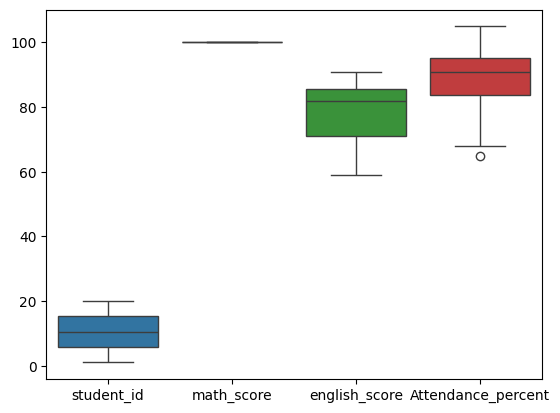

In [20]:
column_num=df.select_dtypes(include=np.number).columns.tolist()

sns.boxplot(df[column_num])

In [29]:

def remove_out(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df[col]=df[col].apply(lambda x:df[col].median() if x<lower or x>upper else x)
    return df
for col in column_num:
    df=remove_out(df,col)
print(df)

    student_id  math_score  english_score  Attendance_percent
0            1        88.0           78.0                92.0
1            2        92.0           85.0                95.0
2            3         NaN           84.0                90.0
3            4        88.0           65.0                91.5
4            5        77.0           59.0                88.0
5            6        89.0           77.0                96.0
6            7        90.0            NaN                94.0
7            8        95.0           89.0                93.0
8            9        88.0           90.0               100.0
9           10        85.0           88.0               105.0
10          11        76.0           91.0                89.0
11          12        91.0           67.0                99.0
12          13        88.0           75.0                75.0
13          14        88.0           60.0                91.5
14          15         NaN           77.0                80.0
15      

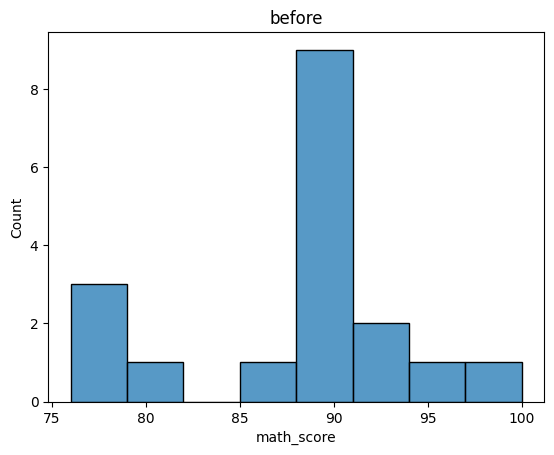

In [31]:
sns.histplot(df['math_score'])
plt.title("before")
plt.show()

In [34]:
df['math_score']=np.log(df['math_score'])